# Finding Relevant Data Case Study

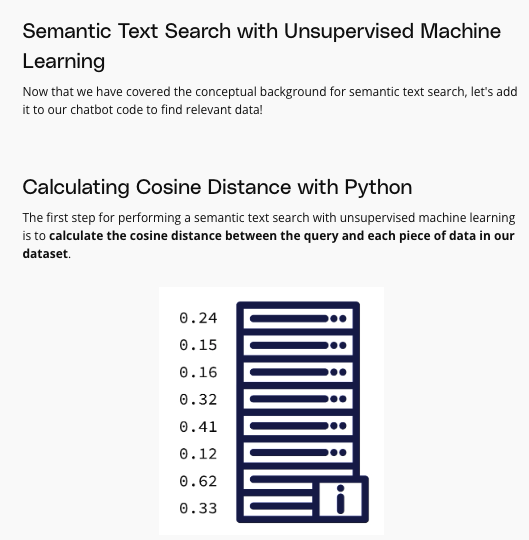 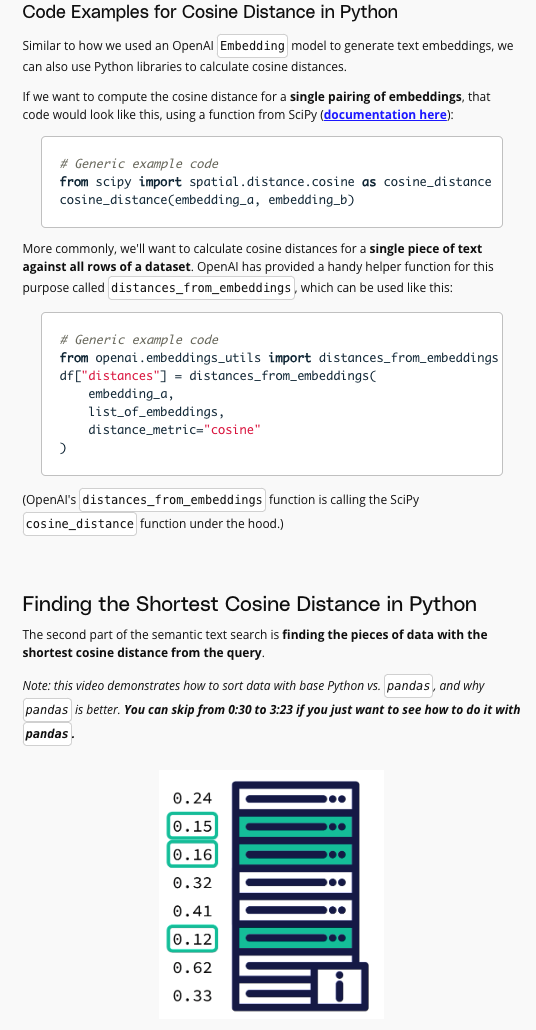

## Cosine Similarity


In [1]:
import numpy as np 
import pandas as pd
df = pd.read_csv("files/embeddings.csv", index_col=0)
df["embeddings"] = df['embeddings'].apply(eval).apply(np.array)
df

,text,embeddings
0,– 2022 (MMXXII) was a common year starting on...,"[4.099189391126856e-05, -0.01798599772155285, ..."
1,– The year saw the removal of nearly all COVI...,"[-0.011040656827390194, -0.02246847189962864, ..."
2,– 2022 was also dominated by wars and armed c...,"[-0.009661431424319744, -0.015304449945688248,..."
3,January 1 – The Regional Comprehensive Econom...,"[-0.0005404727999120951, -0.024158069863915443..."
4,January 2 – Abdalla Hamdok resigns as Prime Mi...,"[-0.015138540416955948, 0.0011573187075555325,..."
...,...,...
180,December 21–December 26 – A major winter storm...,"[-0.02478627674281597, -0.02389226108789444, 0..."
181,December 24 – 2022 Fijian general election: Th...,"[-0.011605652049183846, -0.009253676049411297,..."
182,December 29 – Brazilian football legend Pelé d...,"[-0.007616951130330563, 0.004034563899040222, ..."
183,December 31 – Former Pope Benedict XVI dies at...,"[0.023607414215803146, 0.0077504320070147514, ..."


In [2]:
question = "When did Russia invade ukraine?"

In [3]:
import openai
openai.api_base = "https://openai.vocareum.com/v1"
openai.api_key = "voc-1532767545126677339448966a530fbbd0ba0.61572308"

In [4]:
from openai.embeddings_utils import get_embedding

In [5]:
EMBEDDING_MODEL_NAME = "text-embedding-ada-002"
question_embeddings = get_embedding(question, engine=EMBEDDING_MODEL_NAME)
question_embeddings

[0.0008382523083128035,
 -0.015818314626812935,
 0.0006151293055154383,
 -0.014687495306134224,
 -0.027507824823260307,
 -0.0006221146904863417,
 -0.016554661095142365,
 -0.02372089773416519,
 -0.011682935990393162,
 -0.020433632656931877,
 0.01884259656071663,
 0.024220561608672142,
 -0.009519916959106922,
 -0.009362127631902695,
 -0.008224735036492348,
 -0.014871582388877869,
 0.013753912411630154,
 0.003001271979883313,
 0.03029542602598667,
 -0.02131461910903454,
 -0.007613303605467081,
 -0.012991267256438732,
 -0.0006389619666151702,
 -0.00017525226576253772,
 -0.011202995665371418,
 0.008888761512935162,
 0.011768405325710773,
 -0.0265347957611084,
 0.015108265914022923,
 -0.017803821712732315,
 -0.009618534706532955,
 -0.02358940616250038,
 -0.02086755260825157,
 -0.01763288490474224,
 -0.03794817626476288,
 -0.027849700301885605,
 0.01403004303574562,
 -0.012412709183990955,
 0.014385067857801914,
 -0.001056855428032577,
 0.008106392808258533,
 0.01097288727760315,
 -0.00317220

In [6]:
from openai.embeddings_utils import distances_from_embeddings

In [7]:
distances = distances_from_embeddings(question_embeddings, df['embeddings'].tolist(), distance_metric='cosine' )
distances

[0.2953870520789613,
 0.28125737574474274,
 0.18647906119078184,
 0.29140746212010715,
 0.2611600362752604,
 0.23024378051025718,
 0.2151855217662314,
 0.17794474217474332,
 0.2682339619235433,
 0.2679466562122338,
 0.2880240009256627,
 0.25442533603258766,
 0.2699846865922707,
 0.2629066584353984,
 0.22869709507911207,
 0.2743962946945364,
 0.2621920954859007,
 0.24431461591821413,
 0.20338458281795913,
 0.2709468464510747,
 0.25099789248025206,
 0.25798543689945985,
 0.2843566199685713,
 0.12194242668876665,
 0.1478062709805934,
 0.14001293383346103,
 0.1422652078774148,
 0.18466357135152678,
 0.27340176037921593,
 0.13080330507606375,
 0.15712436675499064,
 0.19511087014366257,
 0.17037542057908028,
 0.12936837908561438,
 0.11384353980840511,
 0.1375016745698282,
 0.15594236872880785,
 0.1480635398536464,
 0.24156591859637755,
 0.2701654991985668,
 0.21826320724840675,
 0.2693154234251205,
 0.27639939459279883,
 0.19644545490253484,
 0.2569599192115122,
 0.1294105213488046,
 0.23693

In [8]:
df['distances'] =distances
df

,text,embeddings,distances
0,– 2022 (MMXXII) was a common year starting on...,"[4.099189391126856e-05, -0.01798599772155285, ...",0.295387
1,– The year saw the removal of nearly all COVI...,"[-0.011040656827390194, -0.02246847189962864, ...",0.281257
2,– 2022 was also dominated by wars and armed c...,"[-0.009661431424319744, -0.015304449945688248,...",0.186479
3,January 1 – The Regional Comprehensive Econom...,"[-0.0005404727999120951, -0.024158069863915443...",0.291407
4,January 2 – Abdalla Hamdok resigns as Prime Mi...,"[-0.015138540416955948, 0.0011573187075555325,...",0.261160
...,...,...,...
180,December 21–December 26 – A major winter storm...,"[-0.02478627674281597, -0.02389226108789444, 0...",0.262060
181,December 24 – 2022 Fijian general election: Th...,"[-0.011605652049183846, -0.009253676049411297,...",0.251418
182,December 29 – Brazilian football legend Pelé d...,"[-0.007616951130330563, 0.004034563899040222, ...",0.293287
183,December 31 – Former Pope Benedict XVI dies at...,"[0.023607414215803146, 0.0077504320070147514, ...",0.294797


In [9]:
df.to_csv("files/distances.csv")

In [10]:
import pandas as pd 
df = pd.read_csv("files/distances.csv", index_col=0)
df

,text,embeddings,distances
0,– 2022 (MMXXII) was a common year starting on...,[ 4.09918939e-05 -1.79859977e-02 -1.71821546e-...,0.295387
1,– The year saw the removal of nearly all COVI...,[-0.01104066 -0.02246847 -0.00058366 ... -0.01...,0.281257
2,– 2022 was also dominated by wars and armed c...,[-0.00966143 -0.01530445 0.01072903 ... -0.00...,0.186479
3,January 1 – The Regional Comprehensive Econom...,[-0.00054047 -0.02415807 -0.00532435 ... -0.00...,0.291407
4,January 2 – Abdalla Hamdok resigns as Prime Mi...,[-0.01513854 0.00115732 -0.02068717 ... -0.00...,0.261160
...,...,...,...
180,December 21–December 26 – A major winter storm...,[-0.02478628 -0.02389226 0.00332341 ... 0.00...,0.262060
181,December 24 – 2022 Fijian general election: Th...,[-0.01160565 -0.00925368 -0.02326271 ... -0.00...,0.251418
182,December 29 – Brazilian football legend Pelé d...,[-0.00761695 0.00403456 0.00835572 ... 0.00...,0.293287
183,December 31 – Former Pope Benedict XVI dies at...,[ 0.02360741 0.00775043 -0.01279436 ... 0.00...,0.294797


In [11]:
current_shortest = df.iloc[0]['distances']
current_shortest_index = 0

current_shortest, current_shortest_index # printing the current_shortest and it's index

(0.2953870520789613, 0)

In [12]:
for index, distance in enumerate(df['distances'].values):
    if distance < current_shortest:
        current_shortest = distance
        current_shortest_index = index

current_shortest, current_shortest_index

(0.1136166325325076, 56)

In [13]:
df.iloc[56]['text']

"April 3 – Russian invasion of Ukraine: As Russia's forces retreat from areas near Kyiv, it is accused by Ukraine of war crimes, amid mounting evidence of indiscriminate civilian killings, including the Bucha massacre."

In [14]:
df.sort_values(by='distances')

,text,embeddings,distances
56,April 3 – Russian invasion of Ukraine: As Russ...,[-0.01219661 -0.01235889 0.00537456 ... 0.01...,0.113617
34,March 2 – Russian invasion of Ukraine: Russia ...,[ 0.00069873 -0.01839943 0.0126504 ... 0.01...,0.113844
163,November 11 – Russian invasion of Ukraine: Ukr...,[-0.01230958 -0.01390749 0.01656015 ... 0.02...,0.117588
155,October 29 – Russian invasion of Ukraine: In r...,[-0.00990201 -0.03036184 0.01550558 ... 0.01...,0.119108
135,September 21 – Russian invasion of Ukraine: Fo...,[-0.02544035 -0.02203042 0.01317994 ... 0.00...,0.120358
...,...,...,...
0,– 2022 (MMXXII) was a common year starting on...,[ 4.09918939e-05 -1.79859977e-02 -1.71821546e-...,0.295387
172,"November 30 – OpenAI releases ChatGPT, an arti...",[-1.13024879e-02 -1.44406212e-02 -5.85894895e-...,0.295838
55,March 31 – Expo 2020 closes in Dubai after a 6...,[-0.00312684 -0.04655766 -0.00169539 ... -0.00...,0.297263
170,November 20 – 2022 Nepalese general election: ...,[-0.00434643 -0.00070388 -0.00164198 ... -0.00...,0.298530


In [15]:
# Now the distances are sorted and we can see how all the less values are almost similar 
df.sort_values(by='distances').to_csv('files/distances_sorted.csv')

## Semantic Search Exercise Tasks

Add your API key to the cell below then run it.

In [16]:
import openai

openai.api_base = "https://openai.vocareum.com/v1"
openai.api_key = "voc-1532767545126677339448966a530fbbd0ba0.61572308"

In [20]:
# The code below loads in the embeddings you previously created. Run it as-is.
import numpy as np
import pandas as pd

df = pd.read_csv('files/embeddings.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array) # .apply(eval) converts the string representations to python list, .apply(np.array) converts the python list to numpy array as it would be super easy to do math operatios


## TODO 1: Create Embeddings for the User's Question

In the previous exercise, you were given the code to create embeddings for everything in the dataset. Now your task is to create embeddings for just one string: the user's question. Assign the result to the variable `question_embeddings`. This variable should contain a list of 1,536 floating point numbers, and the provided code will print the first 100 once `question_embeddings` has been created correctly.

If you're getting stuck, you can click to reveal the solution then copy and paste this into the cell below.

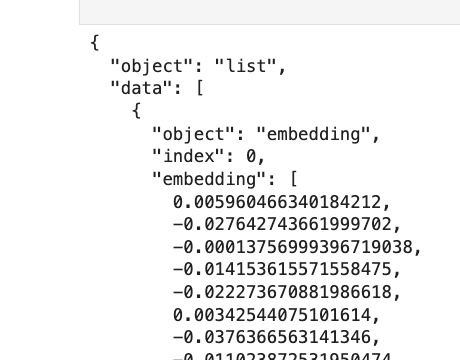

the response will be created in the above format so we have to extract the embeddings from this json fromat

---

<details>
    <summary style="cursor: pointer"><strong>Solution (click to show/hide)</strong></summary>

```python
EMBEDDING_MODEL_NAME = "text-embedding-ada-002"
USER_QUESTION = """What were the estimated damages of the 2023 \
Turkey-Syria earthquake?"""

# Generate the embedding response
response = openai.Embedding.create(
    input=USER_QUESTION,
    engine=EMBEDDING_MODEL_NAME
)

# Extract the embeddings from the response
question_embeddings = response["data"][0]["embedding"]

print(question_embeddings[:100])
```

</details>

In [25]:
EMBEDDING_MODEL_NAME = "text-embedding-ada-002"
USER_QUESTION = """What are the estimated damages of the 2023 \
Turkey-Syria earthquake?"""

# Generate the embedding response 
response = openai.Embedding.create(
    input = USER_QUESTION,
    engine = EMBEDDING_MODEL_NAME
)

# print(response) : the above image format data will be generated 
question_embedding = response['data'][0]['embedding']

print(question_embedding[:100])

[0.005960466340184212, -0.027642743661999702, -0.00013756999396719038, -0.014153615571558475, -0.022273670881986618, 0.00342544075101614, -0.0376366563141346, -0.011023872531950474, 0.0004551749734673649, -0.014246644452214241, 0.012598711997270584, 0.04053382948040962, -0.013940979726612568, -0.012253177352249622, 0.018406346440315247, -0.007634978741407394, 0.013489127159118652, -0.01210698951035738, 0.009674959816038609, -0.0067412410862743855, -0.00611994368955493, 0.011967446655035019, 0.01221995335072279, -0.010651758871972561, 0.015429435297846794, 0.03176257386803627, 0.003770975163206458, -0.003182902466505766, 0.0016986000118777156, -0.00912343431264162, 0.005810956470668316, -0.005897339899092913, -0.02026691474020481, 0.01471178699284792, -0.024679122492671013, -0.006179747637361288, 0.009781278669834137, -0.00512321013957262, 0.02057258039712906, -0.006528604310005903, 0.011781389825046062, 0.025848623365163803, 0.012425944209098816, -0.007920709438621998, -0.0147649459540

## TODO 2: Find Cosine Distances
Create a new list called `distances`, which represents the cosine distances between `question_embeddings` and each value in the `'embeddings'` column of `df`.

If you're getting stuck, you can click to reveal the solution then copy and paste this into the cell below.

---

<details>
    <summary style="cursor: pointer"><strong>Solution (click to show/hide)</strong></summary>

```python
from openai.embeddings_utils import distances_from_embeddings

# Create a list containing the distances from question_embeddings
distances = distances_from_embeddings(
    question_embeddings,
    df["embeddings"],
    distance_metric="cosine"
)

print(distances[:100])
```

</details>

In [29]:
from openai.embeddings_utils import distances_from_embeddings

# Create a list containing the distances from question_embeddings
distances = distances_from_embeddings(
    question_embeddingd,
    df['embeddings'],
    distance_metric = 'cosine'
)
distances[:10]

[0.2909279184505663,
 0.2533679151275301,
 0.2229253617028466,
 0.27218818532157085,
 0.2677741817715502,
 0.27642764392984764,
 0.2454067195009456,
 0.2626530902722115,
 0.25497668926748895,
 0.29419519934928207]

## Sorting by Distance

The code below uses the `distances` list to update `df` then sorts `df` to find the most related rows. Shorter distance means more similarity, so we'll use an ascending sorting order. Run the cell below as-is.

In [30]:
df['distances'] = distances
df.sort_values(by='distances', ascending=True, inplace= True)
df.head(5)

,text,embeddings,distances
93,June 22 – A 6.2 earthquake strikes the Durand ...,"[-0.0016389157390221953, -0.002573922509327531...",0.180329
171,November 21 – A 5.6 earthquake strikes near Ci...,"[0.004015197977423668, -0.004141584504395723, ...",0.181255
109,July 27 – A 7.0 earthquake strikes the island ...,"[0.0020924704149365425, 0.0039183637127280235,...",0.191087
126,September 5 – A 6.8 earthquake strikes Luding ...,"[0.012685112655162811, 0.016252800822257996, 0...",0.203489
119,August 17 – Turkey and Israel agree to restore...,"[-0.010703125037252903, -0.014314130879938602,...",0.217711


Great, now we have the dataset sorted from most relevant to least relevant! Let's save this as a CSV so we can load it in the next step and compose a custom prompt.

Run the cell below as-is.

In [31]:
df.to_csv('files/distances_earthquaqe.csv')

# Step 3 : Compose a Custom Text Prompt

So far we have prepared our dataset, created embeddings, and used unsupervised machine learning to help our model understand the relationships within the data.

Now we're getting to the magic! Our next task is to write a custom prompt that will include the most relevant parts of our dataset. We want our prompt to look something like this

```Answer the question based on the context below, and if the
question can't be answered based on the context, say "I don't
know"

Context: 

{context}

---

Question: {question}
Answer:
```

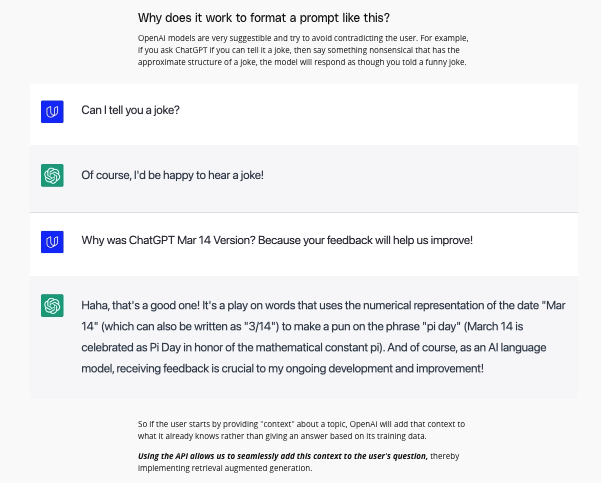
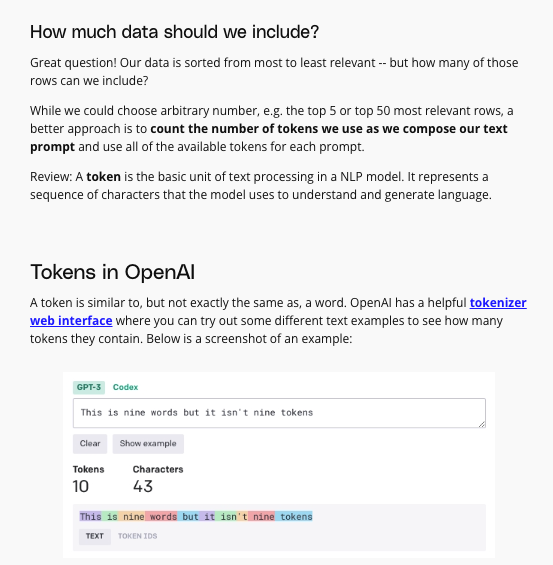

https://platform.openai.com/tokenizer : use this link to check the number of tokens for the text 

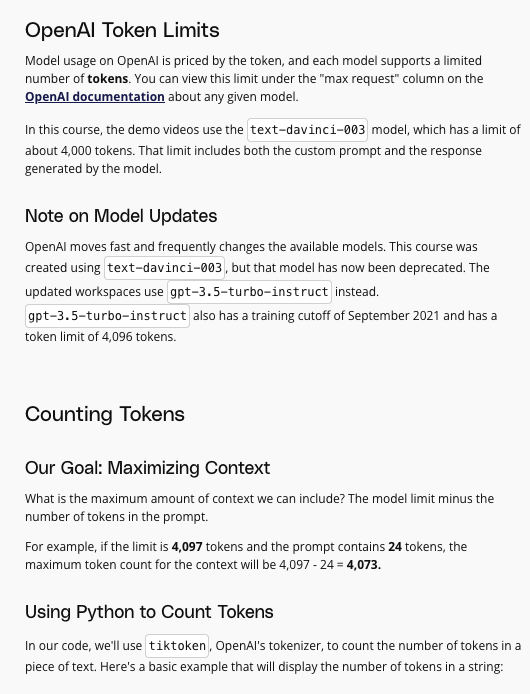

OpenAI embeddings and tokenizer documentation : https://platform.openai.com/docs/guides/embeddings/embedding-models

In [32]:
pip install tiktoken

Note: you may need to restart the kernel to use updated packages.


In [34]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

In [35]:
tokenizer

<Encoding 'cl100k_base'>

In [37]:
tokenizer.encode("This is a question")

[2028, 374, 264, 3488]

In [38]:
tokenizer.encode("when did russia invade Ukraine?")

[9493, 1550, 436, 29578, 75272, 19278, 30]

In [39]:
question = "Who is the president of the united states ?"

tokenizer.encode(question)

[15546, 374, 279, 4872, 315, 279, 29292, 5415, 949]

In [40]:
len(tokenizer.encode(question))

9

## Composing a Custom Text Prompt

Now that we understand OpenAI tokens and how they relate to model query limits and tiktoken, we can compose our custom text prompt with the appropriate number of tokens.

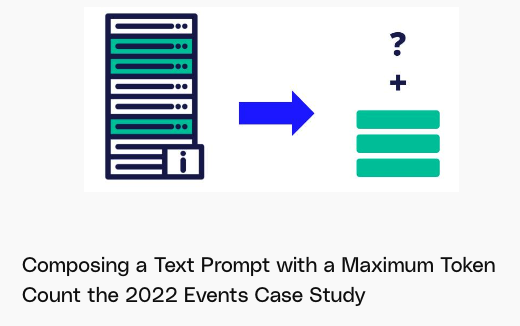

We'll compose our custom prompt by combining some `tiktoken` tokenizing code with our data that has already been sorted by relevance. Similar to the previous step where we created the `get_rows_sorted_by_relevance` function, we will create a reusable function in order to compose a new prompt for each new question.

Our new function `create_prompt` follows these steps:

1. __Instantiate a tokenizer object__ from tiktoken
2. __Initialize a counter__ called current_token_count that starts out with the count of tokens in the prompt template and the question combined
3. __Loop through the dataset__, starting with the most relevant row, and add context to the context string until our counter exceeds the maximum
4. Use the Python string format() method(opens in a new tab) to return a combined string containing the template, context, and question




In [41]:
# Compose the prompt 

prompt_template = """
Answer the question based on the context below, and if the question
can't be answered based on the context, say "I don't know"

Context :

{}

---

Question: {}
Answer:
"""

In [42]:
question = "When did Russia invade Ukraine?"

In [43]:
print(prompt_template.format('context', question))


Answer the question based on the context below, and if the question
can't be answered based on the context, say "I don't know"

Context :

context

---

Question: When did Russia invade Ukraine?
Answer:



In [45]:
max_token_count = 1000 # our wish but can not exceed to the model that we are using and have to be careful as it is charchable 

In [47]:
import tiktoken # we can calculate the number of takes for the text we are using 
tokenizer = tiktoken.get_encoding('cl100k_base')

In [48]:
tokenizer.encode(question)

[4599, 1550, 8524, 75272, 19278, 30]

In [49]:
len(tokenizer.encode(question))

6

In [52]:
current_token_count = len(tokenizer.encode(prompt_template)) + len(tokenizer.encode(question))
current_token_count

46

In [53]:
context = []


In [54]:
import pandas as pd

df = pd.read_csv("files/distances_sorted.csv", index_col=0)
df

,text,embeddings,distances
56,April 3 – Russian invasion of Ukraine: As Russ...,[-0.01219661 -0.01235889 0.00537456 ... 0.01...,0.113617
34,March 2 – Russian invasion of Ukraine: Russia ...,[ 0.00069873 -0.01839943 0.0126504 ... 0.01...,0.113844
163,November 11 – Russian invasion of Ukraine: Ukr...,[-0.01230958 -0.01390749 0.01656015 ... 0.02...,0.117588
155,October 29 – Russian invasion of Ukraine: In r...,[-0.00990201 -0.03036184 0.01550558 ... 0.01...,0.119108
135,September 21 – Russian invasion of Ukraine: Fo...,[-0.02544035 -0.02203042 0.01317994 ... 0.00...,0.120358
...,...,...,...
0,– 2022 (MMXXII) was a common year starting on...,[ 4.09918939e-05 -1.79859977e-02 -1.71821546e-...,0.295387
172,"November 30 – OpenAI releases ChatGPT, an arti...",[-1.13024879e-02 -1.44406212e-02 -5.85894895e-...,0.295838
55,March 31 – Expo 2020 closes in Dubai after a 6...,[-0.00312684 -0.04655766 -0.00169539 ... -0.00...,0.297263
170,November 20 – 2022 Nepalese general election: ...,[-0.00434643 -0.00070388 -0.00164198 ... -0.00...,0.298530


In [55]:
for text in df['text'].values:
    text_token_count = len(tokenizer.encode(text))
    current_token_count += text_token_count

    if current_token_count <= max_token_count:
        context.append(text)
    else:
        break



In [56]:
context

["April 3 – Russian invasion of Ukraine: As Russia's forces retreat from areas near Kyiv, it is accused by Ukraine of war crimes, amid mounting evidence of indiscriminate civilian killings, including the Bucha massacre.",
 'March 2 – Russian invasion of Ukraine: Russia captures its first large city, the Black Sea port of Kherson, as shelling intensifies across many parts of Ukraine, including civilian areas.',
 'November 11 – Russian invasion of Ukraine: Ukrainian forces recapture Kherson, the only regional capital to be taken by Russia since the start of the war.',
 'October 29 – Russian invasion of Ukraine: In response to an alleged Ukrainian drone attack against the Black Sea Fleet, Russia withdraw from a U.N.-brokered deal on the shipment of grain, which had brought down soaring global food prices.',
 'September 21 – Russian invasion of Ukraine: Following a major counteroffensive by Ukraine in the east of the country, Putin announces a partial mobilisation of Russia and threatens n

In [57]:
print(prompt_template.format(context, question))


Answer the question based on the context below, and if the question
can't be answered based on the context, say "I don't know"

Context :

["April 3 – Russian invasion of Ukraine: As Russia's forces retreat from areas near Kyiv, it is accused by Ukraine of war crimes, amid mounting evidence of indiscriminate civilian killings, including the Bucha massacre.", 'March 2 – Russian invasion of Ukraine: Russia captures its first large city, the Black Sea port of Kherson, as shelling intensifies across many parts of Ukraine, including civilian areas.', 'November 11 – Russian invasion of Ukraine: Ukrainian forces recapture Kherson, the only regional capital to be taken by Russia since the start of the war.', 'October 29 – Russian invasion of Ukraine: In response to an alleged Ukrainian drone attack against the Black Sea Fleet, Russia withdraw from a U.N.-brokered deal on the shipment of grain, which had brought down soaring global food prices.', 'September 21 – Russian invasion of Ukraine: Fo

In [60]:
print(prompt_template.format("\n\n##\n\n".join(context), question))


Answer the question based on the context below, and if the question
can't be answered based on the context, say "I don't know"

Context :

April 3 – Russian invasion of Ukraine: As Russia's forces retreat from areas near Kyiv, it is accused by Ukraine of war crimes, amid mounting evidence of indiscriminate civilian killings, including the Bucha massacre.

##

March 2 – Russian invasion of Ukraine: Russia captures its first large city, the Black Sea port of Kherson, as shelling intensifies across many parts of Ukraine, including civilian areas.

##

November 11 – Russian invasion of Ukraine: Ukrainian forces recapture Kherson, the only regional capital to be taken by Russia since the start of the war.

##

October 29 – Russian invasion of Ukraine: In response to an alleged Ukrainian drone attack against the Black Sea Fleet, Russia withdraw from a U.N.-brokered deal on the shipment of grain, which had brought down soaring global food prices.

##

September 21 – Russian invasion of Ukrai

## Querying a Completion Model

Let's complete the final step in our ML-driven prompt engineering process by sending our custom prompt to the Completion model.

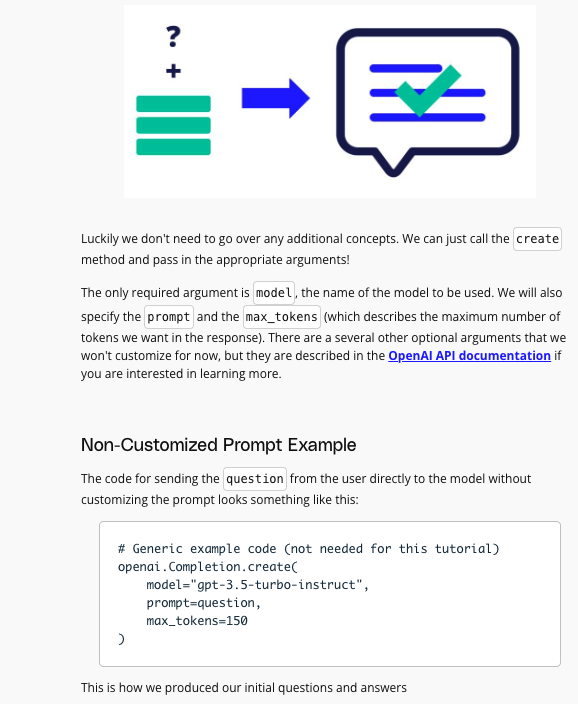 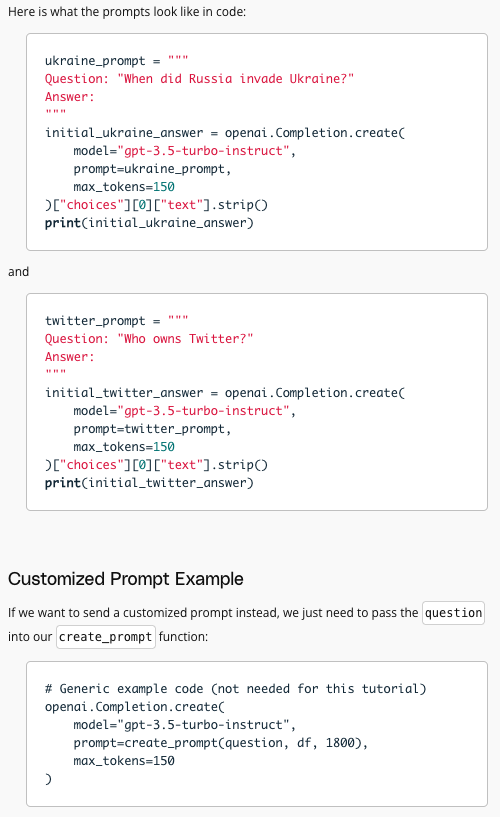
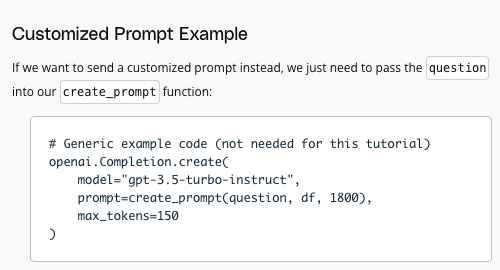

Adding the Query Function to the 2022 Events Case Study
To make this more user-friendly, we'll wrap it in a function and include some logic for adjusting the number of tokens, handling exceptions, and parsing the response from the model:

```COMPLETION_MODEL_NAME = "gpt-3.5-turbo-instruct"

def answer_question(
    question, df, max_prompt_tokens=1800, max_answer_tokens=150
):
    """
    Given a question, a dataframe containing rows of text, and a maximum
    number of desired tokens in the prompt and response, return the
    answer to the question according to an OpenAI Completion model

    If the model produces an error, return an empty string
    """

    prompt = create_prompt(question, df, max_prompt_tokens)

    try:
        response = openai.Completion.create(
            model=COMPLETION_MODEL_NAME,
            prompt=prompt,
            max_tokens=max_answer_tokens
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""
```

Question: When did Russia invade Ukraine?

Answer: February 24, 2022.

Question: Who owns Twitter?

Answer: Elon Musk.

```
custom_ukraine_answer = answer_question("When did Russia invade Ukraine?", df)
print(custom_ukraine_answer)

custom_twitter_answer = answer_question("Who owns Twitter?", df)
print(custom_twitter_answer)
```

__Note on Model Updates__

OpenAI moves fast and frequently changes the available models. This course was created using text-davinci-003, but that model has now been deprecated. The updated workspaces use gpt-3.5-turbo-instruct instead. gpt-3.5-turbo-instruct also has a training cutoff of September 2021 and has a token limit of 4,096 tokens.

In [64]:
import openai
openai.api_base = 'https://openai.vocareum.com/v1'
openai.api_key = "voc-1532767545126677339448966a530fbbd0ba0.61572308"

In [69]:
openai.Completion.create(
    model = 'gpt-3.5-turbo-instruct',
    prompt=prompt_template.format("\n\n###\n\n".join(context), question))["choices"][0]["text"]

'\nFebruary 21 – February 24\n'

# Steps 3 & 4: Querying a Completion Model with a Custom Text Prompt
Add your API key to the cell below then run it.